<a href="https://colab.research.google.com/github/camdenyale/DataScienceProject/blob/main/Milestone_1_Camden_%26_Maeren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geospatial Density Between Starbucks and Dunkin in the United States**
**Collaborators: Maeren Hay and Camden Yale**   
**Link To GitHub Webpage: URL HERE**

## **Project Goals**

Our primary goal is to perform a quantitative comparison of the geospatial density for Starbucks and Dunkin locations in the United States. We will examine signficant regional disparities, specifically:

The Northeast vs Elsewhere

*   The Northeast vs Elsewhere
    *   Are there any significant regional disparities in the Northeast vs Everywhere else? Historically, there is a high concentration of Dunkin's in the Northeast compared to the rest of the country. Why?

*   East vs West
    *   Are there any significant regional disparities in the Northeast vs West?


*   North vs South
    *   Are there any significant regional disparities in the Northeast vs South?

We plan to go beyond simply documenting locations but to determine the underlying factors that establish the regional differences. A few key questions will guide us in our project.


*   Historical and Cultural Roots
    *   Dunkin was founded in Massachusetts while Starbucks was founded in Washington. Does this make a difference in location density?


*   Marketing Strategies
    *   Dunkin emphasizes speed, affordability, and accessibility while Starbucks markets premium goods and affluent locations.


*   Market Competition
    *   Was Dunkin's rapid expansion in the Northeast a plan to push competitors away from a specific region? Is it the same for Starbucks in the West?

Currently, we have identified two datasets that will serve as a foundation for our project. Below we explain each and discuss there benefits.

## **Project Datasets**

This first dataset is from Kaggle.com, by Collin Smith. It is a CSV containing U.S. Dunkin Store Locations and has been last updated 3 years ago. Information was retrieved from Dunkin's location page at https://locations.dunkindonuts.com/en and was gathered with python using the Requests and BeautifulSoup libraries. Lat/Long data was retrieved using the Geopy library. Collin states that the NaNs in the Latitude and Longitude columns indicate the geocoder couldn't locate them. Each observation in this table is a different U.S. Dunkin store with data in variables such as location, hours of operation, and store features. In addition to the locations and hours of operation variables there is an int64 datatype row_id which is our index, and multiple boolean type variables such as drive_thru, mobile_order, dunkin_card, kcup, curbside-pickup,and has_baskin_robbins. Then the loc_lat and loc_long variables are of type  float64. All other variables like address, city, state, zip, phone, and hours are object and category datatypes. Overall this table has 20 columns and 9248 rows. We plan to use this dataset to answer 3 of our main questions: Regional disparities in store locations between Dunkin and Starbuks in the Northeast/Elsewhere, North/South, and East/West. We will tidy this dataset to focus on the nominal and numerical data of locations and quantity of stores. But we hope the boolean variables such as curbside_pickup can give us insight on marketing strategies when answering future questions.

Link to the Dunkin dataset:    
https://www.kaggle.com/datasets/appleturnovers/dunkin-locations?resource=download&select=dunkin_stores.csv

The second dataset we are working with is the Starbucks Store Location 2023: Coffee Giant Growth dataset from Omar Sobhy. We obtained this dataset on kaggle.com. This dataset was created to enable customers to find Starbucks locations near them. Customers, researchers, and students interested in learning more about Starbucks have utilized this dataset. This dataset has 13 columns and 25,601 rows. Columns include Brand, Store Number, Store Name, Ownership Type, Street Address, City, State/Province, Country, Postcode, Phone Number, Timezone, Longitude, and Latitude. Every column except for longitude and latitude is inferred as an object, meaning they are classification variables. Longitude and Latitude pandas are inferred as float64s, meaning they are numerical variables. Even though pandas infers them as objects and float64, we will set our variable datatypes below to ensure they work best with our project. This dataset will help us answer our 3 major questions. Are there any regional disparities between the Northeast vs Everywhere else, North vs South, and East vs West? This, alongside our Dunkin Stores dataset, will serve as the foundation of our project. As we discover the geospatial density of Starbucks and Dunkin, it will enable us to include additional datasets to answer our questions listed in the key questions section. Below, we will tidy this dataset by ensuring it adheres to all tidy data principles learned in class, as well as filtering for Starbucks locations only in the United States and dropping unwanted columns.

Link to the Starbucks dataset:    
https://www.kaggle.com/datasets/omarsobhy14/starbucks-store-location-2023/data



## **Collaboration Plan**

Our plan is to meet once a week to work on our final project. We will meet in person and utilize our GitHub Repository to push code throughout the week. We plan to use text messages to schedule our weekly meetings and use a Google Doc to keep track of to-do list items and possible challenges. At the begining of each weekly meeting, we plan to discuss the previous weeks work, re-align our goals, and ensure consistent progress is being made.



Below is a rough outline of our weekly objectives until the next milestone due date:   



**Week of 10/13 - 10/17:**

*   Decide on questions we are answering

* Generate focused discussion at top of notebook



**Week of 10/20 - 10/24:**

*   Search for 1-2 datasets that tackle our unaswered questions

* (e.g. demographic of customers)  



**Week of 10/27 - 10/31:**

*   Tidy new datasets

* Write documentation and summary of datasets



**Week of 11/03 - 11/07:**  

*   Add 2-3 more relevant statistics/tables (5+ total)



**Week of 11/10 - 11/14:**

*   Decide 2 ideas of model types for our notebook

*   Turn in our assignment on 11/14


## **ETL (Extraxt, Transform, Load)**

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

dunkin_path = kagglehub.dataset_download("appleturnovers/dunkin-locations")

starbucks_path = kagglehub.dataset_download("omarsobhy14/starbucks-store-location-2023")

100%|██████████| 386k/386k [00:00<00:00, 33.2MB/s]

Extracting files...


100%|██████████| 3.63M/3.63M [00:00<00:00, 66.5MB/s]

Extracting files...


### **Dunkin Dataset**

Load original Dunkin dataset

In [ ]:
original_dunkin = pd.read_csv(os.path.join(dunkin_path, 'dunkin_stores.csv'))

View original Dunkin dataset

In [33]:
original_dunkin.head()

,row_id,address_line_1,address_line_2,city,state,zip,phone,mon_hrs,tue_hrs,wed_hrs,...,sat_hrs,sun_hrs,drive-thru,mobile-order,dunkin-card,kcup,curbside-pickup,has-baskin-robbins,loc_lat,loc_long
row_id,,,,,,,,,,,,,,,,,,,,,
0,0,1114 1st St N,Suite 200,Alabaster,AL,35007,(205) 624-4880,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,...,6:00 AM - 8:00 PM,6:00 AM - 8:00 PM,True,False,True,True,False,False,NaN,NaN
1,1,8171 US Highway 431,NaN,Albertville,AL,35950,(256) 869-6075,5:00 AM - 9:00 PM,5:00 AM - 9:00 PM,5:00 AM - 9:00 PM,...,5:00 AM - 10:00 PM,5:00 AM - 9:00 PM,True,True,True,False,False,True,NaN,NaN
2,2,1700 US Highway 72 E,NaN,Athens,AL,35611,(256) 960-9302,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,...,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,True,True,True,True,False,False,34.781698,-86.934524
3,3,171 N College St,NaN,Auburn,AL,36830,(334) 707-8552,6:00 AM - 3:00 PM,6:00 AM - 3:00 PM,6:00 AM - 3:00 PM,...,6:00 AM - 3:00 PM,6:00 AM - 3:00 PM,False,False,True,True,False,False,32.608800,-85.481849
4,4,2049 S College St,NaN,Auburn,AL,36832,(334) 501-2233,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,5:00 AM - 8:00 PM,...,5:00 AM - 8:00 PM,6:00 AM - 8:00 PM,True,True,True,True,False,False,32.567323,-85.501589


Tidy original Dunkin dataset into final Dunkin dataset

In [ ]:
final_dunkin= original_dunkin.drop(columns=['drive-thru', 'mobile-order', 'dunkin-card', 'kcup', 'curbside-pickup', 'has-baskin-robbins', 'row_id', 'mon_hrs','tue_hrs', 'wed_hrs', 'thu_hrs', 'fri_hrs', 'sat_hrs', 'sun_hrs'])
final_dunkin.index.name = 'row_id'


final_dunkin['address'] = np.where(
    pd.notna(final_dunkin['address_line_2']),
    final_dunkin['address_line_1'] + ' (' + final_dunkin['address_line_2'] + ')',
    final_dunkin['address_line_1']
)

final_dunkin = final_dunkin.drop(columns=['address_line_1', 'address_line_2'])


Print Pandas inferred dtypes of Dunkin dataset

In [ ]:
print(final_dunkin.dtypes)

city         object
state        object
zip           int64
phone        object
loc_lat     float64
loc_long    float64
address      object
dtype: object


Map and print correct dtypes for final Dunkin dataset

In [ ]:
dtype_mapping = { 'city': 'category', 'state':
                 'category', 'zip': 'object', 'phone': 'object',
                 'loc_lat': 'float64', 'loc_long': 'float64', 'address': 'object'}
final_dunkin = final_dunkin.astype(dtype_mapping)
print(final_dunkin.dtypes)


city        category
state       category
zip           object
phone         object
loc_lat      float64
loc_long     float64
address       object
dtype: object


View final Dunkin dataset

In [ ]:
final_dunkin.head()

,city,state,zip,phone,loc_lat,loc_long,address
row_id,,,,,,,
0,Alabaster,AL,35007,(205) 624-4880,NaN,NaN,1114 1st St N (Suite 200)
1,Albertville,AL,35950,(256) 869-6075,NaN,NaN,8171 US Highway 431
2,Athens,AL,35611,(256) 960-9302,34.781698,-86.934524,1700 US Highway 72 E
3,Auburn,AL,36830,(334) 707-8552,32.608800,-85.481849,171 N College St
4,Auburn,AL,36832,(334) 501-2233,32.567323,-85.501589,2049 S College St


Tidying this dataset consisted of mostly dropping unwanted columns from our dataframe. We made sure to preserve the original dataset, since some columns we wanted to filter out for now but might be useful later. For example, the boolean datatypes such as drive-thru or mobile-order, might be beneficial later for comparing marketing strategies, but for now we are using this dataset to understand the quantity and location of Dunkin stores in the United States. Next we wanted just one address row instead of two to comply with the attributes of tidy data we learned in class. Therefore we decided to join address_line_1 and address_line_2 using numpy. We used numpy so that we could exclude data under address_line_2 that was NaN, and append present data to address_line_1 in parenthesis. We considered re-ordering the hours for the days of the week, by creating a 'days' and 'hours' column. This did not work because it caused repetitions of our observations, and our purpose in this phase is to keep the location and row_id variables unique, therefore we decided to omit the hours and days of the week. Finally we removed the row_id column and instead renamed the index 'row_id' to eliminate redundance.

### **Starbucks Dataset**

Load the original Starbucks dataset

In [ ]:
original_starbucks_df = pd.read_csv(
   os.path.join(starbucks_path, 'Starbucks Store Locations.csv'),
   encoding='latin1'
)

View the original dataset

In [ ]:
original_starbucks_df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


Drop unwanted columns using .drop() and sort entries in the table to only include entries in the United States.

In [ ]:
final_starbucks_df = original_starbucks_df.drop(columns=['Store Name', 'Ownership Type'])[original_starbucks_df["Country"] == "US"]

View what pandas inferrs our datatypes to be so we can decide if we want to set them differently.

In [ ]:
print(final_starbucks_df.dtypes)

Brand              object
Store Number       object
Street Address     object
City               object
State/Province     object
Country            object
Postcode           object
Phone Number       object
Timezone           object
Longitude         float64
Latitude          float64
dtype: object


Change the variable datatypes to better align with our project goals.

In [ ]:
dtype_mapping = {
   'Brand': 'category',
   'Store Number': 'category',
   'City': 'category',
   'State/Province': 'category',
   'Country': 'category',
   'Timezone': 'category',
   'Postcode': 'object',
}
final_starbucks_df = final_starbucks_df.astype(dtype_mapping)

View the mapped datatypes

In [ ]:
print(final_starbucks_df.dtypes)

Brand             category
Store Number      category
Street Address      object
City              category
State/Province    category
Country           category
Postcode            object
Phone Number        object
Timezone          category
Longitude          float64
Latitude           float64
dtype: object


View the tidied dataset

In [ ]:
final_starbucks_df.head()

,Brand,Store Number,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
11965,Starbucks,3513-125945,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,907-339-0900,GMT-09:00 America/Anchorage,-149.78,61.21
11966,Starbucks,74352-84449,1725 Abbott Rd,Anchorage,AK,US,995073444,907-339-2800,GMT-09:00 America/Anchorage,-149.84,61.14
11967,Starbucks,12449-152385,1501 Huffman Rd,Anchorage,AK,US,995153596,907-339-1300,GMT-09:00 America/Anchorage,-149.85,61.11
11968,Starbucks,24936-233524,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,(907) 227-9631,GMT-09:00 America/Anchorage,-149.89,61.13
11969,Starbucks,8973-85630,1005 E Dimond Blvd,Anchorage,AK,US,995152050,907-344-4160,GMT-09:00 America/Anchorage,-149.86,61.14


To tidy this dataset, we first started by dropping unwanted columns. We made sure to keep an original dataset stored in a dataframe to ensure that if we want the columns back for future use, we can utilize them. We decided we no longer needed "Store Name" or "Ownership Type" because they serve no direct correlation to our Dunkin dataset. The Store Number column is sufficient. We then needed to sort our data so it only includes Starbucks locations in the United States. We did this by finding all rows where the 'Country' column matched 'US'. This was a necessity because we are not comparing Starbucks and Dunkin locations worldwide, but nationally. We kept all other columns as they will help us in tracking our geospatial density. Pandas inferred our datatypes to be all objects except for Longitude and Latitude, which are float64. Pandas correctly inferred Longitude and Latitude, so we did not have to map new data types to those variables. Postcode, Phone Number, and Street Address, which were assigned the object datatype, stayed the same because they are unique values. We changed the variables Brand, Store Number, City, State/Province, Country, and Timezone to have a category datatype instead of an object. This was more efficient than treating them like an object because it is faster and takes less memory. Our final_starbucks_df holds our tidy dataset and will be used in our analysis throughout the remainder of this project.

## **EDA (Exploratory Data Analysis)**


### **Dunkin Statistics**

#### **Total Dunkin locations by region**

Create a mapping that maps states to their respective regions

In [ ]:
regions_mapping = {
    # Northeast Region
    'ME': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
    'PA': 'Northeast',
    # Midwest Region
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'NE': 'Midwest', 'KS': 'Midwest',
    # South Region
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South',
    'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South', 'KY': 'South',
    'TN': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South',
    # West Region
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West',
    'UT': 'West', 'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West',
    'HI': 'West',
    'PR': 'Other'
}

Get a count for Dunkin stores in each region by temporarily mapping the 'State/Province' column to the region mapping above. Use value counts to count the number of entries in each region.

In [ ]:
dunkin_regional_counts = final_dunkin['state'].map(regions_mapping).value_counts()

View the total Dunkin locations by region

In [ ]:
for region, count in dunkin_regional_counts.items():
  print(f"Dunkin locations in the {region}: {count}")

Dunkin locations in the Northeast: 5047
Dunkin locations in the South: 2493
Dunkin locations in the Midwest: 1373
Dunkin locations in the West: 335


We decided our first statistics should be identifying the total dunkin locations in each region. It was super important that we chose which regioning system we wanted to use. We opted for the four region (West, South, Midwest, Northeast). This will be extremely beneficial for our analysis of Northeast vs West, Northeast vs South, and Northeast vs Everything else. These stats are interesting because they are already showing pattern trends in our data. (Much higher amount of Dunkin's in the Northeast compared to Starbucks).

#### **Top 5 states with the most Dunkin Locations**

Get the 5 states with the most starbucks locations by accessing the 'State/Province' column and using value counts to count the total entries for each state. Print the top 5 using head(5)

In [ ]:
dunkin_state_counts = final_dunkin['state'].value_counts()

View the 5 states with the most Dunkin locations

In [ ]:
print("Top 5 states with the most Dunkin stores:")
print(dunkin_state_counts.head(5))

Top 5 states with the most Dunkin stores:
state
NY    1419
MA    1075
FL     871
NJ     864
IL     697
Name: count, dtype: int64


We found the top 5 states with the most Dunkin locations in the United states for another statistic. We deemed this relevant to our leading questions because knowing the states with the most Dunkin locations can indicate hub areas. In the future if we consider a visualization like a map, we can show concentration of stores by the opacity of our markers, based off of these popularity rankings. This could also be useful in identifying market competition.

### **Starbucks Statistics**

#### **Total Starbucks locations by region**

Create a mapping that maps states to their respective regions

In [ ]:
regions_mapping = {
    # Northeast Region
    'ME': 'Northeast', 'VT': 'Northeast', 'NH': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
    'PA': 'Northeast',
    # Midwest Region
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'NE': 'Midwest', 'KS': 'Midwest',
    # South Region
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South',
    'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South', 'KY': 'South',
    'TN': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South',
    # West Region
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West',
    'UT': 'West', 'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West',
    'HI': 'West',
    'PR': 'Other'
}

Get a count for Starbucks stores in each region by temporarily mapping the 'State/Province' column to the region mapping above. Use value counts to count the number of entries in each region.

In [ ]:
starbucks_regional_counts = (final_starbucks_df['State/Province'].map(regions_mapping).value_counts())

View the total Starbucks locations by region

In [ ]:
for region, count in starbucks_regional_counts.items():
    print(f"Starbucks locations in the {region}: {count}")

Starbucks locations in the West: 5610
Starbucks locations in the South: 3992
Starbucks locations in the Midwest: 2253
Starbucks locations in the Northeast: 1753


We decided our first statistics should be identifying the total starbucks locations in each region. It was super important that we chose which regioning system we wanted to use. We opted for the four region (West, South, Midwest, Northeast). This will be extremely benefical for our of Northeast vs West, Northeast vs South, and Northeast vs Everything else. These stats are interesting because they are already showing pattern trends in our data. (Much higher amount of Dunkin's in the Northeast compared to Starbucks).

#### **Top 5 states with the most Starbucks locations**

Get the 5 states with the most starbucks locations by accessing the 'State/Province' column and using value counts to count the total entries for each state. Print the top 5 using head(5)

In [ ]:
starbucks_state_counts = (final_starbucks_df['State/Province'].value_counts())

View the 5 states with the most Starbucks locations

In [ ]:
print("Top 5 states with the most Starbucks stores:")
print(starbucks_state_counts.head(5))

Top 5 states with the most Starbucks stores:
State/Province
CA    2821
TX    1042
WA     757
FL     694
NY     645
Name: count, dtype: int64


We found the top 5 states with the most Starbucks locations in the United states for another statistic. We deemed this relevant to our leading questions because knowing the states with the most Starbucks locations can indicate hub areas. In the future if we consider a visualization like a map, we can show concentration of stores by the opacity of our markers, based off of these popularity rankings. This could also be useful in identifying market competition.

### **Visual**

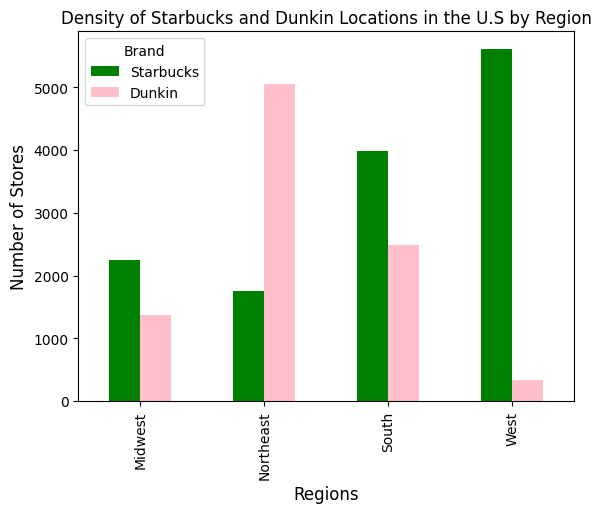

In [ ]:
starbucks_and_dunkin_df = pd.DataFrame({
   'Starbucks': starbucks_regional_counts,
   'Dunkin': dunkin_regional_counts
}).fillna(0).astype(int)

starbucks_and_dunkin_df.plot(kind='bar', color=['green', 'pink'])

plt.title('Density of Starbucks and Dunkin Locations in the U.S by Region')
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.legend(title='Brand', loc='upper left')

We decided to do a bar graph as our first visual. We utilized the statistics of Starbucks and Dunkin locations by region we found above to see the distribution. This will be extremely useful in answering our question of Are there any significant regional disparities in the Northeast vs Everywhere else? Northeast vs West, and Northeast vs South. Starbucks is represented by the green bars while Dunkin is represented by the Orange bar. From this visual we can see some pretty extreme distributions of locations. For example, Starbucks has over 5,000 locations in the West but Dunkin has less than 500 locations in the West.